In [1]:
# Your code here


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import missingno as msno
from sklearn.impute import KNNImputer




In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv').iloc[:,1:]
ds.to_csv('/workspaces/machine-learning-python-template/data/raw/machinelearning.csv', index=False)# he descargado y guardado el csv
ds.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
ds.shape 

(48895, 15)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [5]:
ds.nunique()

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [6]:
print(ds.duplicated().sum())#comprobación de duplicados 

0


In [7]:
ds.drop(columns= ['name', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'neighbourhood_group'], inplace= True) #Eliminamos columnas inecesarias 


In [8]:
ds.isnull().any(axis=0)

neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [9]:
ds['has_review'] = (ds['number_of_reviews'] > 0).astype(int) 
#Explicación del código:ds['number_of_reviews'] > 0: Esto crea una serie booleana donde cada valor es True si number_of_reviews es mayor que 0, y False si es 0..astype(int): Convierte los valores booleanos a enteros. True se convierte en 1 y False se convierte en 0.El resultado se asigna a una nueva columna llamada 'has_review'.

In [10]:
ds.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review
0,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,1
1,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1
2,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0
3,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1
4,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Aplico el encoder a la columna que a cada valor le aplica un valor numérico
ds["neighbourhood"] = label_encoder.fit_transform(ds["neighbourhood"])
ds

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review
0,108,40.64749,-73.97237,Private room,149,1,9,6,365,1
1,127,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1
2,94,40.80902,-73.94190,Private room,150,3,0,1,365,0
3,41,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1
4,61,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1
...,...,...,...,...,...,...,...,...,...,...
48890,13,40.67853,-73.94995,Private room,70,2,0,2,9,0
48891,28,40.70184,-73.93317,Private room,40,4,0,2,36,0
48892,94,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,0
48893,95,40.75751,-73.99112,Shared room,55,1,0,6,2,0


In [15]:
mapping = {'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2}

ds['room_type'] = ds['room_type'].map(mapping)
ds

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review,neighbourhood_frecuency
0,108,40.64749,-73.97237,1,149,1,9,6,365,1,175
1,127,40.75362,-73.98377,2,225,1,45,2,355,1,1545
2,94,40.80902,-73.94190,1,150,3,0,1,365,0,2658
3,41,40.68514,-73.95976,2,89,1,270,1,194,1,572
4,61,40.79851,-73.94399,2,80,10,9,1,0,1,1117
...,...,...,...,...,...,...,...,...,...,...,...
48890,13,40.67853,-73.94995,1,70,2,0,2,9,0,3714
48891,28,40.70184,-73.93317,1,40,4,0,2,36,0,2465
48892,94,40.81475,-73.94867,2,115,10,0,1,27,0,2658
48893,95,40.75751,-73.99112,0,55,1,0,6,2,0,1958


In [12]:
ds.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review
0,108,40.64749,-73.97237,Private room,149,1,9,6,365,1
1,127,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1
2,94,40.80902,-73.94190,Private room,150,3,0,1,365,0
3,41,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1
4,61,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1


In [16]:
#frecuencia = ds.value_counts('neighbourhood')
#ds['neighbourhood_frecuency'] = ds['neighbourhood'].map(frecuencia)
#ds

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,has_review,neighbourhood_frecuency
0,108,40.64749,-73.97237,1,149,1,9,6,365,1,175
1,127,40.75362,-73.98377,2,225,1,45,2,355,1,1545
2,94,40.80902,-73.94190,1,150,3,0,1,365,0,2658
3,41,40.68514,-73.95976,2,89,1,270,1,194,1,572
4,61,40.79851,-73.94399,2,80,10,9,1,0,1,1117
...,...,...,...,...,...,...,...,...,...,...,...
48890,13,40.67853,-73.94995,1,70,2,0,2,9,0,3714
48891,28,40.70184,-73.93317,1,40,4,0,2,36,0,2465
48892,94,40.81475,-73.94867,2,115,10,0,1,27,0,2658
48893,95,40.75751,-73.99112,0,55,1,0,6,2,0,1958


NameError: name 'imputador_knn' is not defined

In [ ]:
ds.room_type.value_counts()


room_type
3    25409
2    22326
1     1160
Name: count, dtype: int64

In [ ]:
ds.isnull().mean()*100 # Incidencia de los valores perdidos en cada una de las variables

neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
has_review                        0.0
neigh_group_numeric               0.0
dtype: float64

<Axes: >

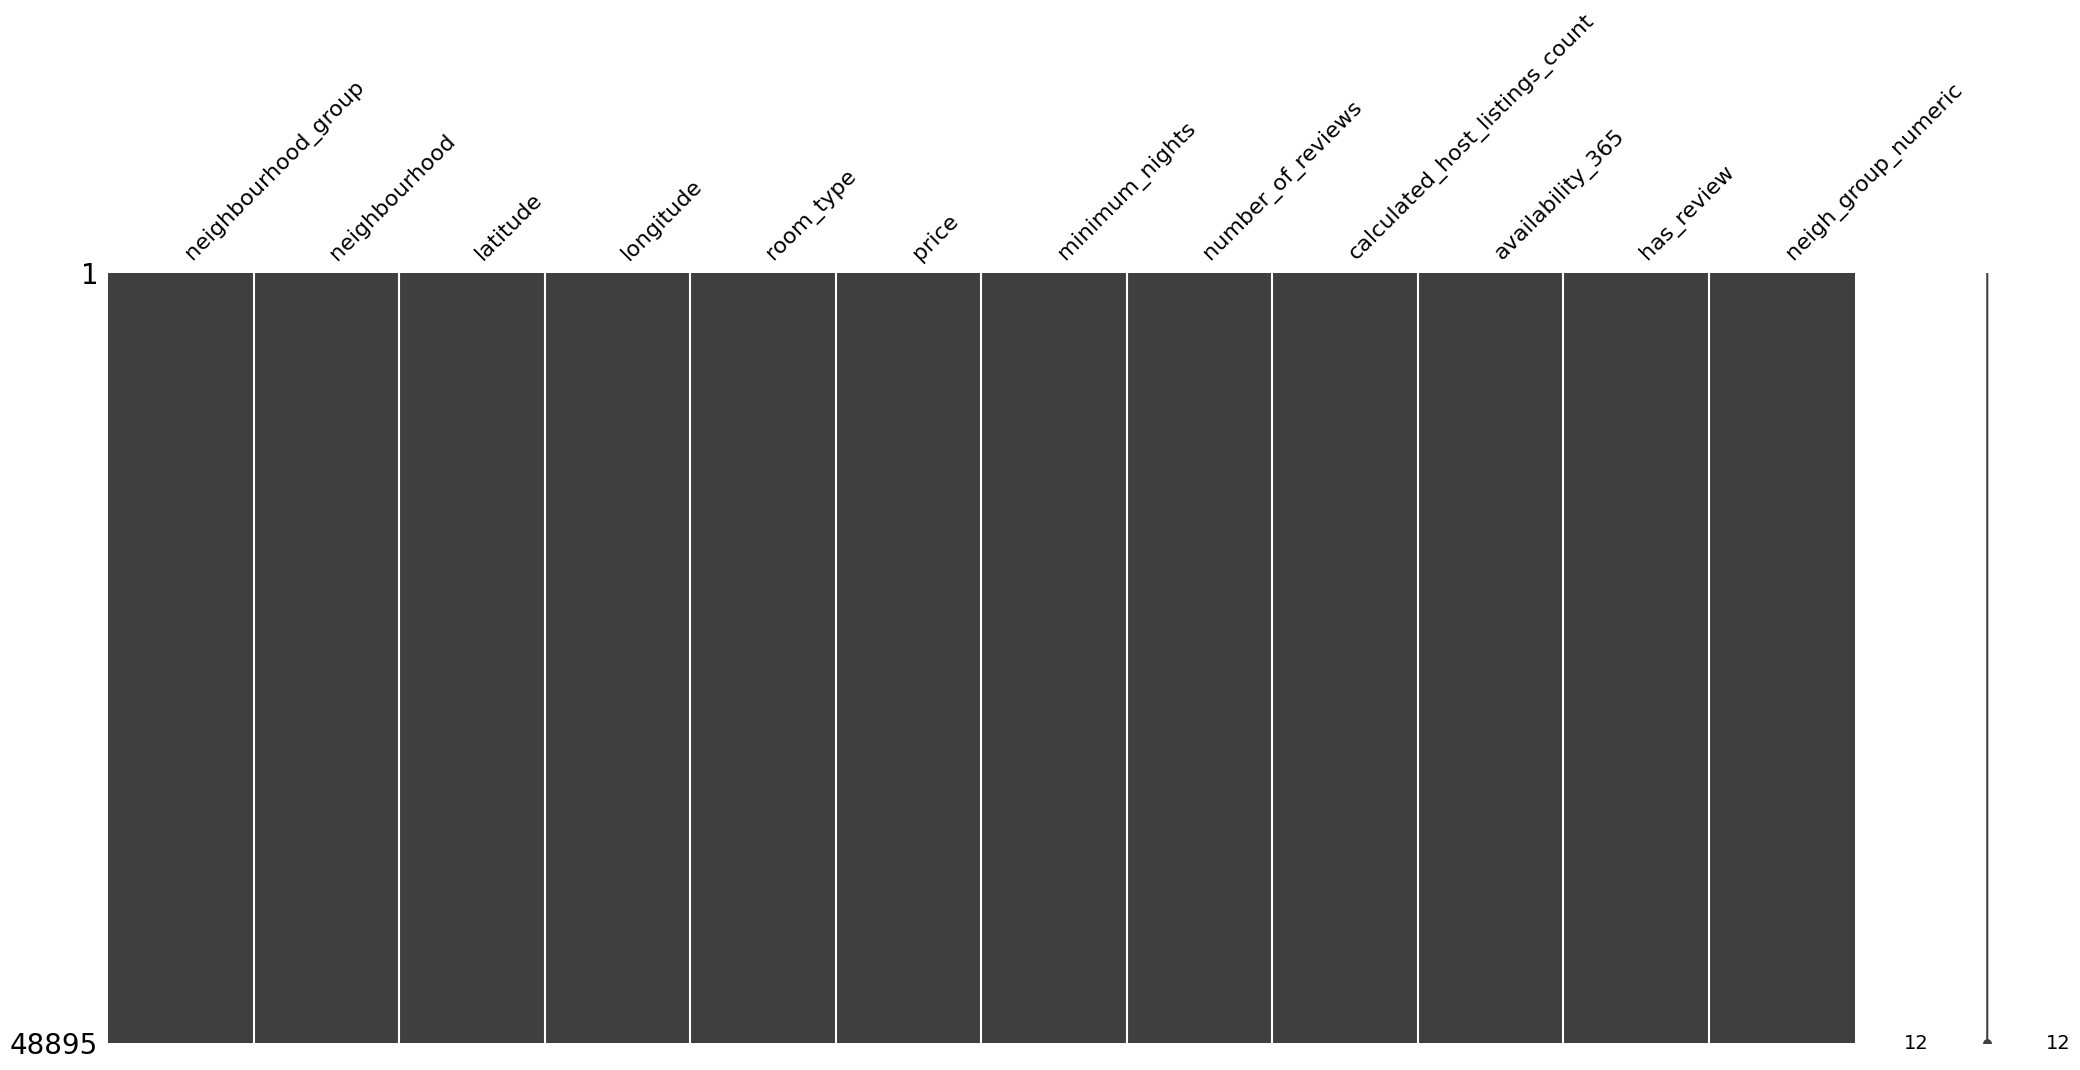

In [ ]:
msno.matrix(ds)

In [ ]:
ds.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.729,0.055,40.500,40.690,40.723,40.763,40.913
longitude,48895.0,-73.952,0.046,-74.244,-73.983,-73.956,-73.936,-73.713
room_type,48895.0,2.496,0.545,1.000,2.000,3.000,3.000,3.000
price,48895.0,152.721,240.154,0.000,69.000,106.000,175.000,10000.000
minimum_nights,48895.0,7.030,20.511,1.000,1.000,3.000,5.000,1250.000
number_of_reviews,48895.0,23.274,44.551,0.000,1.000,5.000,24.000,629.000
calculated_host_listings_count,48895.0,7.144,32.953,1.000,1.000,1.000,2.000,327.000
availability_365,48895.0,112.781,131.622,0.000,0.000,45.000,227.000,365.000
has_review,48895.0,0.794,0.404,0.000,1.000,1.000,1.000,1.000
neigh_group_numeric,48895.0,107.123,68.743,0.000,51.000,94.000,178.000,220.000
